<a href="https://colab.research.google.com/github/priya606/Multple-Linear-Regression/blob/main/MLR(ASSIGNMENT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

##Loading the data

In [2]:
data=pd.read_csv('/content/Boston.csv')

In [3]:
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df=data.drop('Unnamed: 0',axis=1)

In [5]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


##Analysing the data

In [6]:
df.keys()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

1.CRIM: per capita crime rate by town

2.ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

3.INDUS: proportion of non-retail business acres per town

4.CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5.NOX: nitric oxides concentration (parts per 10 million)

6.RM: average number of rooms per dwelling

7.AGE: proportion of owner-occupied units built prior to 1940

8.DIS: weighted distances to ﬁve Boston employment centers

9.RAD: index of accessibility to radial highways

10.TAX: full-value property-tax rate per $10,000

11.
PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lower status of the population

12.MEDV: Median value of owner-occupied homes in $1000s

In [7]:
df.shape

(506, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
black      357
lstat      455
medv       229
dtype: int64

In [10]:
df.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### check duplicate values

In [11]:
df.duplicated().sum()

0

### check null values

In [12]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

##Visualising the data

In [13]:
print('residential landed zone is(zn):',df['zn'].unique())

residential landed zone is(zn): [ 18.    0.   12.5  75.   21.   90.   85.  100.   25.   17.5  80.   28.
  45.   60.   95.   82.5  30.   22.   20.   40.   55.   52.5  70.   34.
  33.   35. ]


In [14]:
print(' accessibility to radial highways is:',df['rad'].unique())

 accessibility to radial highways is: [ 1  2  3  5  4  8  6  7 24]


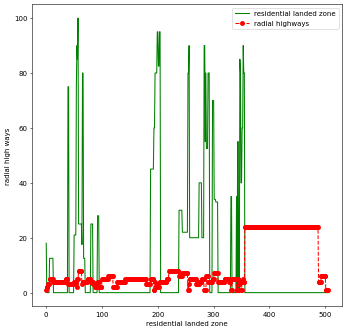

In [15]:
plt.figure(figsize=(8,8),dpi=50)
plt.plot(df['zn'],color='green',label='residential landed zone')
plt.plot(df['rad'],'o--',color='red',label='radial highways')
plt.xlabel('residential landed zone')
plt.ylabel('radial high ways')
plt.legend()

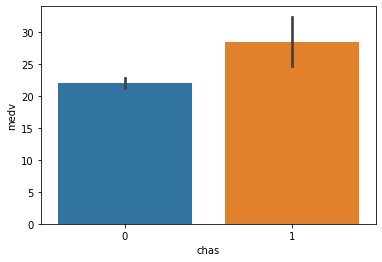

In [16]:
plt.plot(figsize=(8,8),dpi=40)
sns.barplot(x='chas',y='medv',data=df)


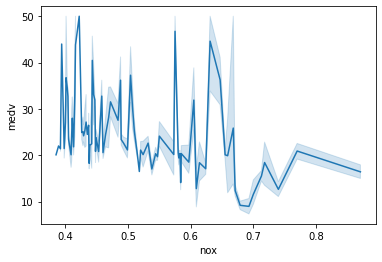

In [17]:
sns.lineplot(x='nox',y='medv',data=df)

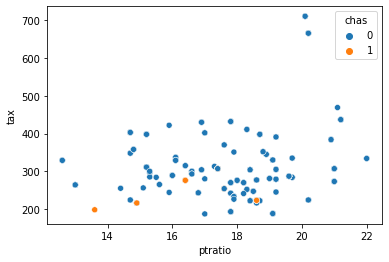

In [18]:
sns.scatterplot(x='ptratio',y='tax',hue='chas',data=df)

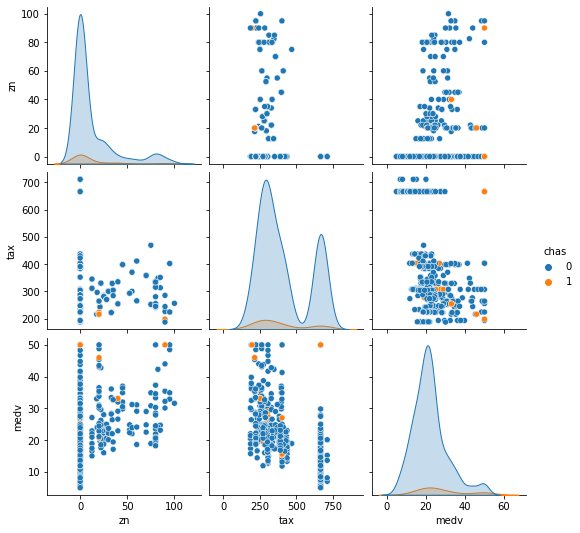

In [19]:
sns.pairplot(df,hue='chas',vars=['zn','tax','medv'])

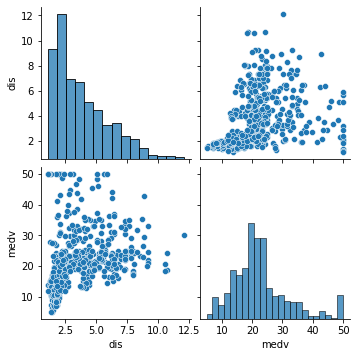

In [20]:
sns.pairplot(df,vars=['dis','medv'])

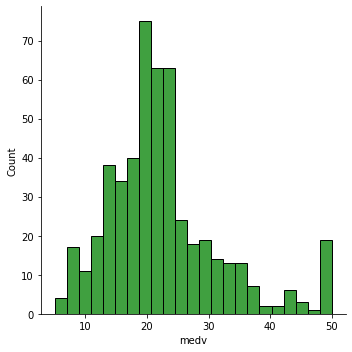

In [21]:
sns.displot(df['medv'],color='green')

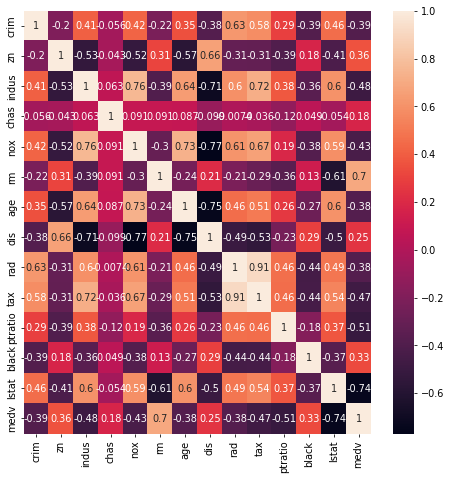

In [22]:
plt.figure(figsize=(8,8),dpi=70)
df1=df.corr()
sns.heatmap(df1,annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


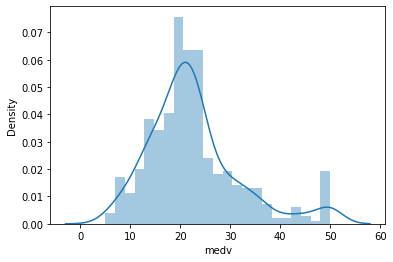

In [23]:
sns.distplot(df['medv'])

##Defining x and y

In [24]:
x=df.iloc[:,:-1]

In [25]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [26]:
y=df.iloc[:,-1:]

In [27]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Training and fitting the model using sklearn

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=5)

In [29]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

## Predicting and visualising the data

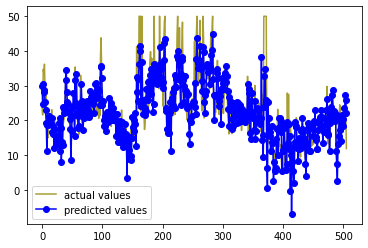

In [30]:
plt.plot(y,label='actual values',color='#a89e32')
plt.plot(lr.predict(x),'o-',label='predicted values',color='blue')
plt.legend()

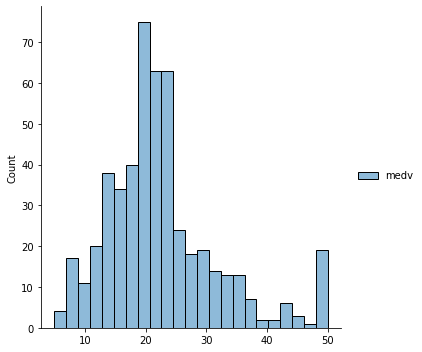

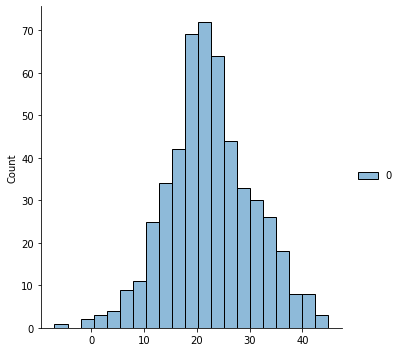

In [31]:
sns.displot(y)
sns.displot(lr.predict(x))

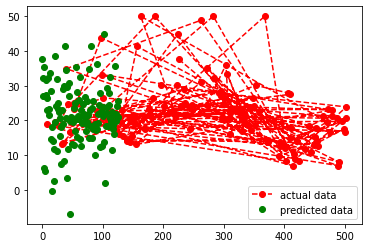

In [32]:
plt.plot(ytest,'o--',color='red',label='actual data')
plt.plot(lr.predict(xtest),'o',color='green',label='predicted data')
plt.legend()

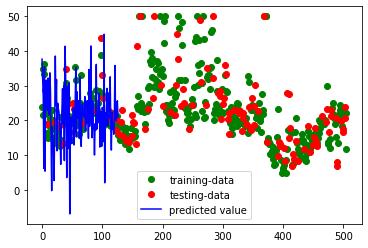

In [51]:
plt.plot(ytrain,'o',color='green',label='training-data')
plt.plot(ytest,'o',color='red',label='testing-data')
plt.plot(lr.predict(xtest),color='blue',label='predicted value')
plt.legend()

In [33]:
df2=pd.DataFrame()
df2['actual_values']=ytest.values.ravel()
df2['predicted_values']=lr.predict(xtest)

In [34]:
df2.head(10)

,actual_values,predicted_values
0,37.6,37.657162
1,27.9,32.101821
2,22.6,27.008057
3,13.8,6.213310
4,35.2,35.485990
5,10.4,5.396964
6,23.9,27.450586
7,29.0,31.592957
8,22.8,26.469939
9,23.2,22.914344


# Evaluating the model

In [35]:
print('training score is:',lr.score(xtrain,ytrain))
print('testing score is:',lr.score(xtest,ytest))

training score is: 0.7468034208269783
testing score is: 0.7059096071098054


In [36]:
from sklearn.metrics import r2_score
print('r2_score is:',r2_score(ytest,lr.predict(xtest)))

r2_score is: 0.7059096071098054


In [37]:
from sklearn.metrics import mean_squared_error
print('mean_squared_error is:',mean_squared_error(ytest,lr.predict(xtest)))

mean_squared_error is: 24.274608311687825


In [38]:
from sklearn.metrics import mean_absolute_error
print('mean_absolute_error is:',mean_absolute_error(ytest,lr.predict(xtest)))

mean_absolute_error is: 3.290018352688548


In [57]:
lr.coef_

array([[-1.53004848e-01,  4.79388437e-02, -8.60131597e-03,
         2.57986675e+00, -1.46325645e+01,  3.96283436e+00,
        -7.92357629e-03, -1.46078023e+00,  3.45431204e-01,
        -1.24503134e-02, -9.19092768e-01,  1.32203623e-02,
        -5.17255347e-01]])

In [58]:
lr.intercept_

array([32.21412039])

In [60]:
y_pred=lr.predict(xtest)

In [62]:
lr.score(xtest,ytest)

0.7059096071098054